In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('Names.csv')
df

,iq,full_name
0,108,"Mr.Aarav,Mandlik"
1,109,"Mr.Vivaan,Kotian"
2,91,"Mr.Aditya,Mandlik"
3,139,"Mr.Vihaan,Pujari"
4,130,"Mr.Arjun,Pujari"
...,...,...
95,92,"Miss.Divya,Panigrahi"
96,123,"Mr.Ravi,Lokhande"
97,131,"Miss.Komal,Lokhande"
98,126,"Mr.Sahil,Kamble"


In [3]:
df[['title', 'first_last']] = df['full_name'].str.split('.', expand=True)
df[['first_name', 'last_name']] = df['first_last'].str.split(',', expand=True)
df.drop(['full_name', 'first_last'], axis=1, inplace=True)


In [4]:
df

,iq,title,first_name,last_name
0,108,Mr,Aarav,Mandlik
1,109,Mr,Vivaan,Kotian
2,91,Mr,Aditya,Mandlik
3,139,Mr,Vihaan,Pujari
4,130,Mr,Arjun,Pujari
...,...,...,...,...
95,92,Miss,Divya,Panigrahi
96,123,Mr,Ravi,Lokhande
97,131,Miss,Komal,Lokhande
98,126,Mr,Sahil,Kamble


In [12]:
df.columns

Index(['iq', 'title', 'first_name', 'last_name', 'text'], dtype='object')

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
iq,100.0,110.35,24.248451,54.0,91.75,112.0,129.25,150.0


In [5]:
df['text'] = df['title'] + ' ' + df['first_name'] + ' ' + df['last_name']


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['iq']


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.8380843068855689
MAE: 6.160874799643606


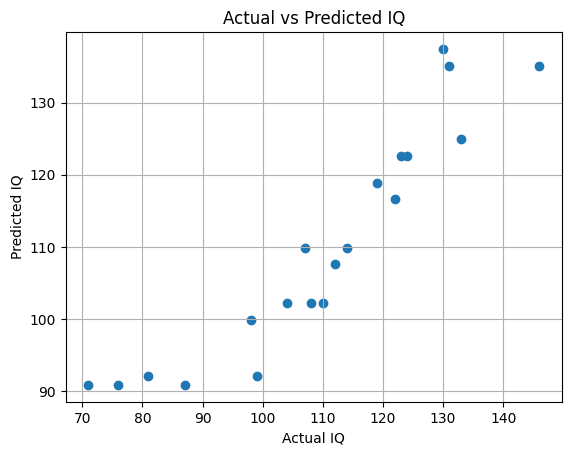

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual IQ")
plt.ylabel("Predicted IQ")
plt.title("Actual vs Predicted IQ")
plt.grid(True)
plt.show()

In [14]:
feature_names = vectorizer.get_feature_names_out()
coef = model.coef_
top_n = 10
top_features = np.argsort(np.abs(coef))[-top_n:]
print("\nTop influential name features:")
for i in top_features:
    print(f"{feature_names[i]}: {coef[i]:.2f}")


Top influential name features:
aryan: -18.82
prisha: -21.14
kamble: 23.51
panigrahi: -25.55
talwar: -29.62
kunal: -30.91
lokhande: 36.23
veluthat: -46.70
duggirala: -48.06
pujari: 67.08


In [15]:
def label_iq(iq):
    if iq < 100:
        return 'Low'
    elif iq < 120:
        return 'Average'
    elif iq < 140:
        return 'High'
    else:
        return 'Genius'

df['iq_label'] = df['iq'].apply(label_iq)


In [16]:
df

,iq,title,first_name,last_name,text,iq_label
0,108,Mr,Aarav,Mandlik,Mr Aarav Mandlik,Average
1,109,Mr,Vivaan,Kotian,Mr Vivaan Kotian,Average
2,91,Mr,Aditya,Mandlik,Mr Aditya Mandlik,Low
3,139,Mr,Vihaan,Pujari,Mr Vihaan Pujari,High
4,130,Mr,Arjun,Pujari,Mr Arjun Pujari,High
...,...,...,...,...,...,...
95,92,Miss,Divya,Panigrahi,Miss Divya Panigrahi,Low
96,123,Mr,Ravi,Lokhande,Mr Ravi Lokhande,High
97,131,Miss,Komal,Lokhande,Miss Komal Lokhande,High
98,126,Mr,Sahil,Kamble,Mr Sahil Kamble,High


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['iq_label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

     Average       0.75      0.43      0.55         7
      Genius       0.33      1.00      0.50         1
        High       0.75      0.50      0.60         6
         Low       0.67      1.00      0.80         6

    accuracy                           0.65        20
   macro avg       0.62      0.73      0.61        20
weighted avg       0.70      0.65      0.64        20


Confusion Matrix:
 [[3 0 1 3]
 [0 1 0 0]
 [1 2 3 0]
 [0 0 0 6]]


In [22]:
def label_iq(iq):
    if iq < 100:
        return 'Low'
    elif iq < 120:
        return 'Average'
    elif iq < 140:
        return 'High'
    else:
        return 'Genius'
df['iq_label'] = df['iq'].apply(label_iq)


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Now y_encoded contains 0,1,2,3

# Update train/test split with encoded y
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf = GridSearchCV(xgb, params, cv=3, scoring='accuracy', verbose=0)
clf.fit(X_train, y_train)


/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [12:24:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [12:24:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [12:24:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [12:24:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not us

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [26]:
best_model = clf.best_estimator_

In [27]:
y_pred = best_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Best Parameters:", clf.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.33      1.00      0.50         1
           2       0.75      0.50      0.60         6
           3       0.62      0.83      0.71         6

    accuracy                           0.60        20
   macro avg       0.58      0.69      0.58        20
weighted avg       0.64      0.60      0.59        20



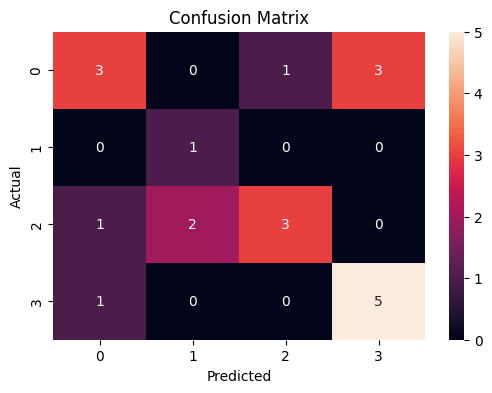

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
feature_names = vectorizer.get_feature_names_out()
importances = best_model.feature_importances_
indices = np.argsort(importances)[-10:]


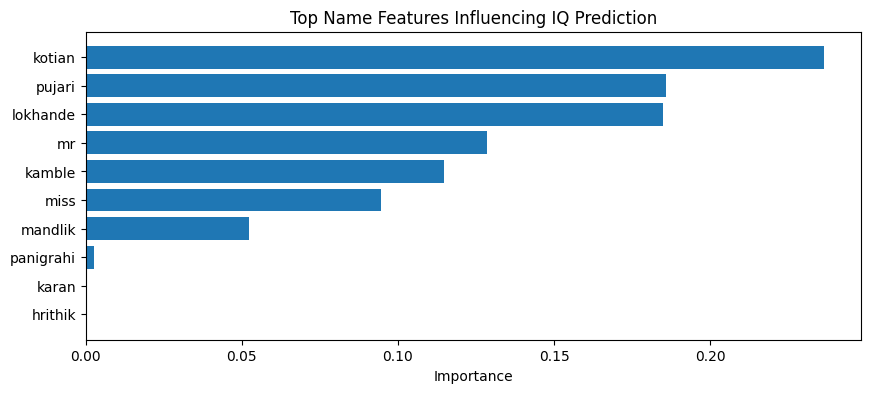

In [30]:
plt.figure(figsize=(10, 4))
plt.barh(range(10), importances[indices], align='center')
plt.yticks(range(10), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.title("Top Name Features Influencing IQ Prediction")
plt.show()

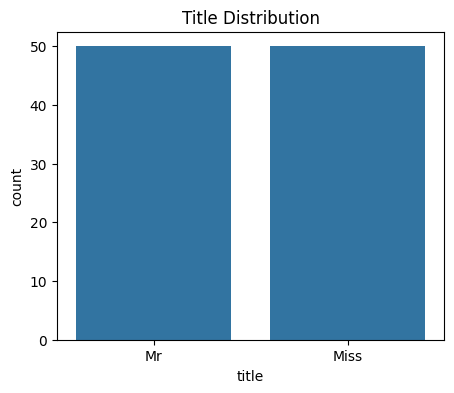

In [31]:
plt.figure(figsize=(5, 4))
sns.countplot(x='title', data=df)
plt.title("Title Distribution")
plt.show()

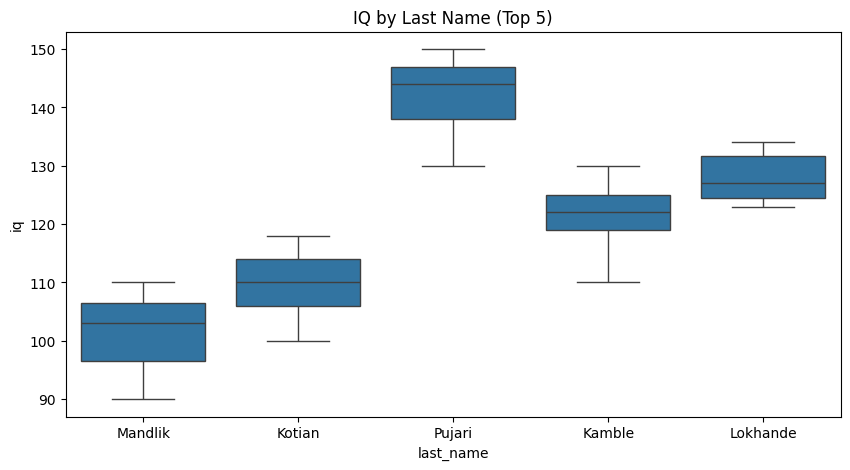

In [32]:
plt.figure(figsize=(10, 5))
top_last_names = df['last_name'].value_counts().nlargest(5).index
sns.boxplot(x='last_name', y='iq', data=df[df['last_name'].isin(top_last_names)])
plt.title("IQ by Last Name (Top 5)")
plt.show()

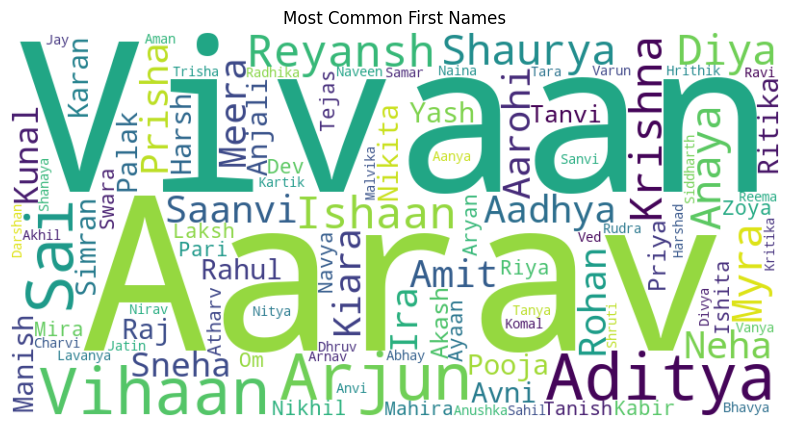

In [33]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(df['first_name']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common First Names")
plt.show()